In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import datetime
from IPython.core.display import HTML
%matplotlib inline


In [3]:
#Import dataset
df = pd.read_csv ('rgr_data_test.csv',sep=',')

#Rename Columns
column_name_map = { 'LOCATION' : 'City',
                    'RIDER_ID' : 'Rider_ID',
                    'APPLICATION_DATE' : 'Application Date',
                    'APPLICATION_APPROVED_DATE' : 'Application Approved Date',
                    'FIRST_WORK_DATE' : 'First Work Date',
                    'ACQUISITION_CHANNEL' : 'Acquisition Channel',
                    'VEHICLE_TYPE' : 'Vehicle',
                    'DAYS_SINCE_ACQUISITION' : 'Days Since Acquisition',
                    'HOURS_WORKED_CUMULATIVE' : 'Hours Worked Cumulative',
                    'ORDERS_DELIVERED_CUMULATIVE' : 'Orders Delivered Cumulative',
                    'THROUGHPUT_CUMULATIVE' : 'Throughput Cumulative',
                    'REFERRALS_CUMULATIVE' : 'Referrals Cumulative',
                    'SUCCESSFUL_REFERRALS_CUMULATIVE' : 'Successful Referrals Cumulative'} 
df = df.rename(columns=column_name_map)

## Introduction

Looking at the Rider Get Rider scheme across various markets. We will be looking at the rider's job performance (delivery metrics) as well as their recruitment potential (referral metrics) split by their market, vehicle and acquisition channel.

## Summary

- The Rider Get Rider (RGR or 'Referral') acquisition channel varies in size by market. 
    - Contributing  the highest number of applications for Scooter riders in Roo York.
    - However it is a small to negligible channel in Roo de Janeiro
    
      
      

- Across markets and vehicles, RGR riders perform as well if not better than riders who join Organically.
    - RGR riders also have the highest number of successful referrals compared to other acquisition channels
    
      

- There is room to boost the level of referrals overall, either by encouraging a higher referral volume in areas with currently high success rates or educating users on the process to increase the success rate of referrals in areas with low success rates.
    - Roo York scooter riders have the highest success rate and volume of successful referrals per rider. With the average number of successful referrals per rider at above 0.3 for Organic and RGR channels. Therefore the focus in these markets could be to boost the volume of referrals made to benefit from the high success rate of referrals.
    - Conversely Roo de Janeiro has the lowest success rate for referrals for any market analysed in this report. Therefore the focus here should potentially be on improving the quality of referrals before attempting to increase the volume.

## Data Selection

Riders in this report are those from Roo York and Roo de Janeiro, whose application was approved between 2016-09-05 and 2017-04-10. Additionally we will only looking at the channels with sufficient volume, Organic/Referral/Digital (and Offline for Roo York).

We can see from the chart below that the bulk of applications come within this window, with very few outside of this window. As applications outside the main time window may not be representative of this group, they have been removed.  
The right hand chart shows the volumes by channel for the reduced time window.

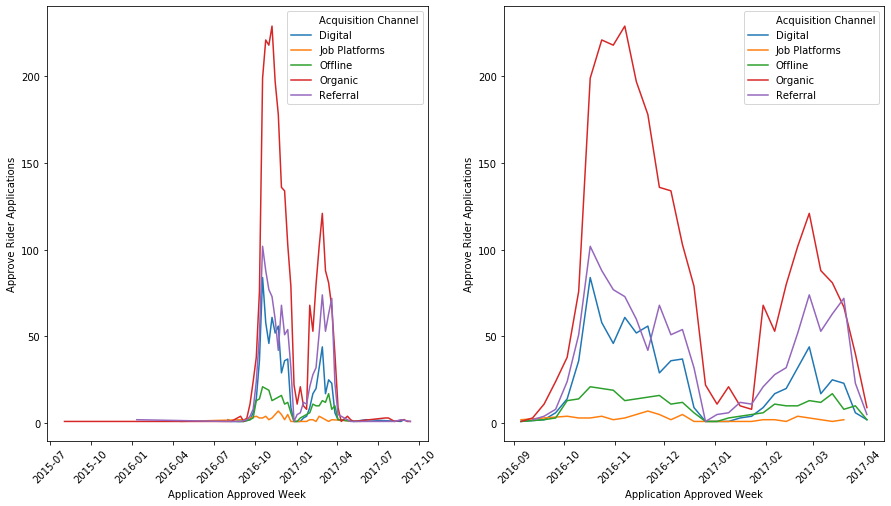

In [4]:
#Very messy. Smushed 2 cells/plots together to fit on one figure for better display. But this whole cell should be rewritten.
#Shows the volume of applications by channel over time with the date limiter on the second plot

time_df = df.loc[~(df['Application Approved Date'].isna()) &
                 (df['Days Since Acquisition']==28),:].copy()

time_df['Application Approved Date'] = pd.to_datetime(time_df['Application Approved Date'])
time_df['Application Approved Week'] = time_df['Application Approved Date'] - time_df['Application Approved Date'].dt.weekday.astype('timedelta64[D]')

time_df = time_df.loc[time_df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle']),['Application Approved Week','Application Approved Date','City','Acquisition Channel','Vehicle','Rider_ID','Hours Worked Cumulative','Orders Delivered Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]

line_df = time_df.groupby(['Application Approved Week','Acquisition Channel'])
line_df = line_df.agg({
                'Rider_ID' : 'nunique', 
                'Hours Worked Cumulative' : 'sum',
                'Orders Delivered Cumulative' : 'sum',
                'Referrals Cumulative' : 'sum',
                'Successful Referrals Cumulative' : 'sum'})
line_df = line_df.reset_index()
line_df = line_df.sort_values(by = ['Acquisition Channel','Application Approved Week'])

fig, axes = plt.subplots(1,2,figsize=(15,8))

time_df = df.loc[~(df['Application Approved Date'].isna()) &
                 (df['Days Since Acquisition']==28) &
                 (df['Application Approved Date']>'2016-09-05') &
                 (df['Application Approved Date']<'2017-04-10'),:].copy()

time_df['Application Approved Date'] = pd.to_datetime(time_df['Application Approved Date'])
time_df['Application Approved Week'] = time_df['Application Approved Date'] - time_df['Application Approved Date'].dt.weekday.astype('timedelta64[D]')

time_df = time_df.loc[time_df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle']),['Application Approved Week','Application Approved Date','City','Acquisition Channel','Vehicle','Rider_ID','Hours Worked Cumulative','Orders Delivered Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]

line_df2 = time_df.groupby(['Application Approved Week','Acquisition Channel'])
line_df2 = line_df2.agg({
                'Rider_ID' : 'nunique', 
                'Hours Worked Cumulative' : 'sum',
                'Orders Delivered Cumulative' : 'sum',
                'Referrals Cumulative' : 'sum',
                'Successful Referrals Cumulative' : 'sum'})
line_df2 = line_df2.reset_index()
line_df2 = line_df2.sort_values(by = ['Acquisition Channel','Application Approved Week'])

sns.lineplot(data=line_df, x="Application Approved Week", y="Rider_ID", hue='Acquisition Channel', ax = axes[0])
sns.lineplot(data=line_df2, x="Application Approved Week", y="Rider_ID", hue='Acquisition Channel', ax = axes[1])

for i in [0,1]:
    plt.sca(axes[i])
    plt.xticks(rotation=45)
    plt.ylabel('Approve Rider Applications')
plt.show()

In [5]:
# Create dataframes for our 2 locations
# Here we would also insert our outlier removal/treatment

#For RDJ
# Bicycle applications from the timeframe
# Organic, digital and referral channels (other channels have low volume)

rdj_df = df.loc[(df['City']=='Roo de Janeiro') &
                (df['Vehicle']=='Bicycle') &
                (df['Application Approved Date']>'2016-09-05') &
                (df['Application Approved Date']<'2017-04-10'),:].copy()

#For RY
# Bicycle and scooter applications from the tiemframe
# Organic, digital, referral and offline channels

ry_df = df.loc[(df['City']=='Roo York') &
                (df['Vehicle'].isin(['Bicycle','Scooter / Motorcycle'])) &
                (df['Application Approved Date']>'2016-09-05') &
                (df['Application Approved Date']<'2017-04-10'),:].copy()


In [6]:
#Compare rider metrics between channels for one vehicle, use 28 day mark as default
def compare_rider_channel_table(dataframe, vehicle, acquisition_channels, days_since_acq = 28):
    #Manipulate frame into required state
    table_df = dataframe.copy()
    
    table_df = table_df.loc[(table_df['Acquisition Channel'].isin(acquisition_channels)) &
                            (table_df['Vehicle']==vehicle) &
                            (table_df['Days Since Acquisition']==days_since_acq),
                            ['Acquisition Channel','Vehicle','Orders Delivered Cumulative','Hours Worked Cumulative','Throughput Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]
    table_df['Riders'] = 1
    table_df = table_df.groupby(['Vehicle','Acquisition Channel']).sum().reset_index()
    
    table_df['Average Orders Delivered'] =  table_df['Orders Delivered Cumulative'] / table_df['Riders']
    table_df['Overall Throughput'] = table_df['Orders Delivered Cumulative'] /  table_df['Hours Worked Cumulative']
    table_df['Average Successful Referrals'] = table_df['Successful Referrals Cumulative'] / table_df['Riders']
    table_df['Referral Success Rate'] = table_df['Successful Referrals Cumulative'] / table_df['Referrals Cumulative']

    table_df = table_df.loc[:,['Acquisition Channel','Riders','Average Orders Delivered','Overall Throughput','Average Successful Referrals','Referral Success Rate']]
    table_df = table_df.style.format({'Average Orders Delivered':'{:,.0f}',
                                      'Overall Throughput':'{:,.2f}',
                                      'Referral Success Rate':'{:,.2%}',
                                      'Average Successful Referrals':'{:,.2f}'}).hide_index() 

    display(table_df)


In [7]:
#Compare rider metrics over time, 7/14/28/56/84 days

#Rider metrics
# Total delviered, average delivered
# Throughput
# Average sucessful referrals

def compare_rider_time_plot(dataframe, vehicle, acquisition_channels):
    plot_df = dataframe.copy()
    
    plot_df = plot_df.loc[(plot_df['Acquisition Channel'].isin(acquisition_channels)) &
                            (plot_df['Vehicle']==vehicle),
                            ['Days Since Acquisition','Acquisition Channel','Vehicle','Orders Delivered Cumulative','Hours Worked Cumulative','Throughput Cumulative','Referrals Cumulative','Successful Referrals Cumulative']]
    plot_df['Riders'] = 1
    plot_df = plot_df.groupby(['Days Since Acquisition','Vehicle','Acquisition Channel']).sum().reset_index()
    
    plot_df['Average Orders Delivered'] =  plot_df['Orders Delivered Cumulative'] / plot_df['Riders']
    plot_df['Overall Throughput'] = plot_df['Orders Delivered Cumulative'] /  plot_df['Hours Worked Cumulative']
    plot_df['Average Successful Referrals'] = plot_df['Successful Referrals Cumulative'] / plot_df['Riders']
    plot_df['Average Hours Worked'] = plot_df['Hours Worked Cumulative'] / plot_df['Riders']
    
    #Plot data
    fig, axes = plt.subplots(2,2,figsize=(15,15))

    #Remove iteration as not that useful for 2x2 plots
#    metric_list = ['Orders Delivered Cumulative','Average Orders Delivered','Overall Throughput','Average Successful Referrals']
#    for i,metric in enumerate(metric_list):
#       sns.lineplot(data=test_df, x="Days Since Acquisition", y=metric, hue='Acquisition Channel', ax=axes[i]).set_title(metric)
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Average Orders Delivered', hue='Acquisition Channel', ax=axes[0,0]).set_title('Average Orders Delivered')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Overall Throughput', hue='Acquisition Channel', ax=axes[0,1]).set_title('Overall Throughput')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Average Successful Referrals', hue='Acquisition Channel', ax=axes[1,0]).set_title('Average Successful Referrals')
    sns.lineplot(data=plot_df, x="Days Since Acquisition", y='Average Hours Worked', hue='Acquisition Channel', ax=axes[1,1]).set_title('Average Hours Worked')
    plt.show()
        

### Roo de Janeiro

#### Bicycles

- Overall volume through referrals is very low, 84 RGR riders compared to 1223 Organic riders in the same time frame.
- The average number of orders delivered by a RGR rider is slightly higher than an organic rider, likely driven by the higher throughput of RGR riders
- Riders who were recruited through RGR seem much more likely to use the scheme themselves. With 5 times more successful referrals than an organic rider (0.2 vs 0.04)
- The growth of throughput of RGR riders decreases over time, this is not seen for the other channels.
- There is a sharp increase in the number of successful referrals over time. This does not appear to be driven by an outlier and may indicate that the long term value of referrals may take time to materialise.

For Roo de Janeiro RGR is currently a very small acquisition channel. Expanding the RGR channel may cause cannabalisation from the organic channel, this is likely given that it is currently the largest acquisition channel for this vehicle type in this location. However if this increases awareness of the RGR scheme in the rider population overall, we may see the overall average number of successful referrals per rider increase overall. 


In [8]:
#Tables with 168 days of data
print('RDJ')
compare_rider_channel_table(rdj_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral'], days_since_acq=168)


RDJ


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals,Referral Success Rate
Digital,40,573,2.35,0.03,3.33%
Organic,1223,466,2.40,0.04,10.49%
Referral,84,519,2.46,0.20,14.17%


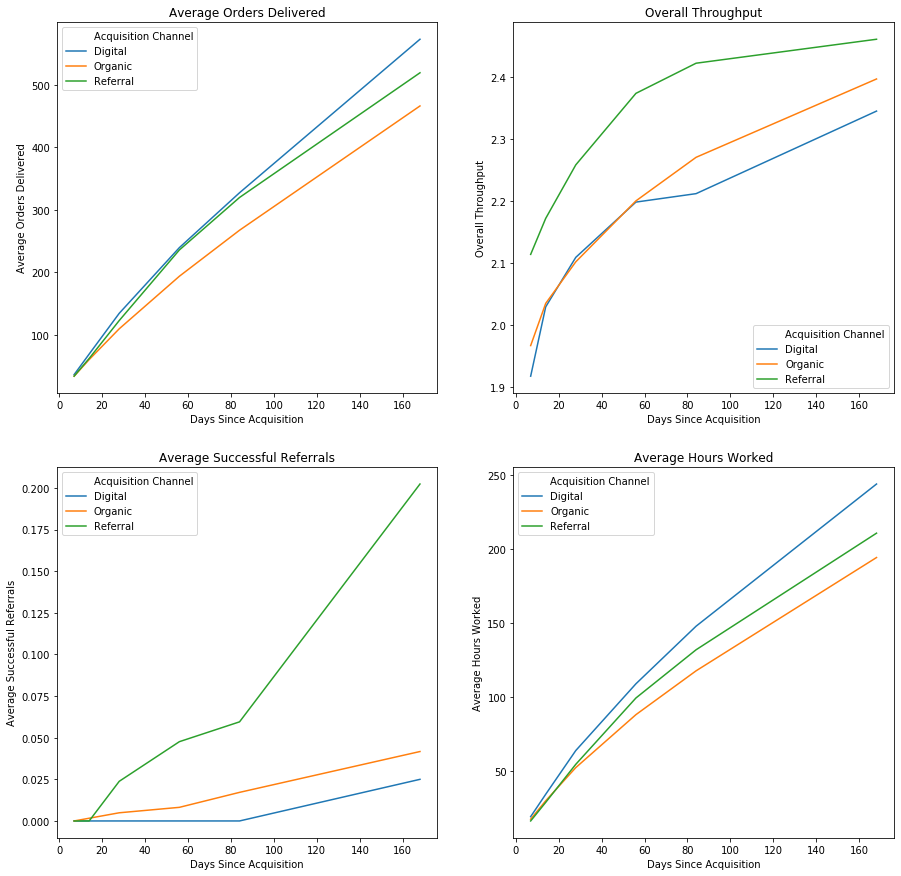

In [9]:
#Roo de Janiero, Bicycles, 3 channels
compare_rider_time_plot(rdj_df,vehicle='Bicycle',acquisition_channels=['Organic','Digital','Referral'])

#The 'ranking' of channels appears unchanged over time.
#The orders delivered and referrals gap grows over time.
# Referral throughput growth is slowing over time. This is not the case for other channels

#Given these graphs should we reconsider setting the comparison point used above? ie: 28 days after acquisition
#Should potentially move to 168 to capture as some metrics diverge quite a lot from the point at 28days

### Roo York

#### Bicycle

- In Roo York the RGR scheme is a large contributor at about 2/3s the size of the largest channel, Organic
- RGR riders deliver a similar number of orders to organic traffic and have a similar level of throughput.
- RGR riders also have the highest number of average successful referrals. For each RGR rider recruited, we can expect 0.18 riders to be recruited through referrals. 

RGR riders perform similarly or slightly better than Organic riders, so there does not seem to be any risk to attempting to expand this channel (if the RGR riders were poor performers, we may want to focus efforts elsewhere).   
Of interest here is that the Organic channel has a fairly lower number of successful referrals. However the success rate is quite high compared to what was seen in Roo de Janeiro. This indicates that we may be able to increase the number of successful referrals by simply increasing the number of referrals made by riders from the Organic channel.

In [10]:

compare_rider_channel_table(ry_df, vehicle = 'Bicycle', acquisition_channels=['Organic','Digital','Referral','Offline'], days_since_acq=168)


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals,Referral Success Rate
Digital,533,173,1.73,0.10,12.16%
Offline,155,168,1.76,0.08,28.89%
Organic,921,214,1.87,0.10,19.04%
Referral,610,223,1.83,0.18,27.23%


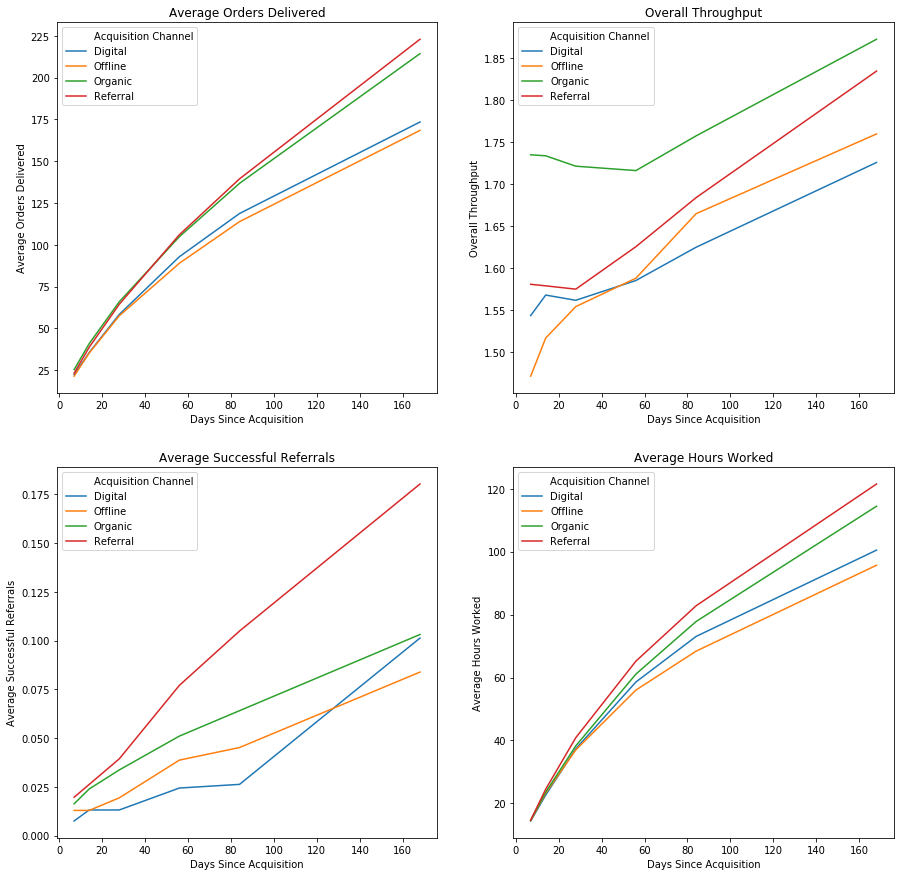

In [11]:
#Roo York, Bicycle, 4 channels
compare_rider_time_plot(ry_df,vehicle='Bicycle',acquisition_channels=['Organic','Digital','Referral','Offline'])

#The ranking of referral applicants doesn't change over time, though other channels appear to move.
#Apart from for average orders delivered, where it overtakes organic. However the difference is small
#Again RGR referrals diverges from the other channels over time
#Throughput for referrals is not dropping here

#'Referrals' colour is different for RY compared to RDJ, green to red. It should be maintained with a colour mapping to avoid confusion, but not implementing here due to time

#### Scooter

- Similar to the Bicycle riders, RGR scooter riders perform as well if not better than Organic riders or riders from other channels
    - This seems to be due to these riders working more hours, as their throughput is not higher than other channels.
- Similar to the bicycle riders in Roo de Janeiro, the throughput for RGR riders appears to stop growing or at least grows slower than other channels.
- Scooter riders in Roo York have the highest referral metrics of any market analysed so far.

The markets and vehicles with higher average successful referral rates benefit more from additional marketing effort, as the referrals act as a multiplying effect on the marketing effort. Therefore less effort is required to gain the same number of riders in this market compared to others.

In [12]:
compare_rider_channel_table(ry_df, vehicle = 'Scooter / Motorcycle', acquisition_channels=['Organic','Digital','Referral','Offline'], days_since_acq=168)


Acquisition Channel,Riders,Average Orders Delivered,Overall Throughput,Average Successful Referrals,Referral Success Rate
Digital,118,664,2.25,0.23,36.00%
Offline,104,715,2.31,0.29,23.44%
Organic,285,791,2.23,0.31,38.10%
Referral,488,988,2.24,0.37,28.44%


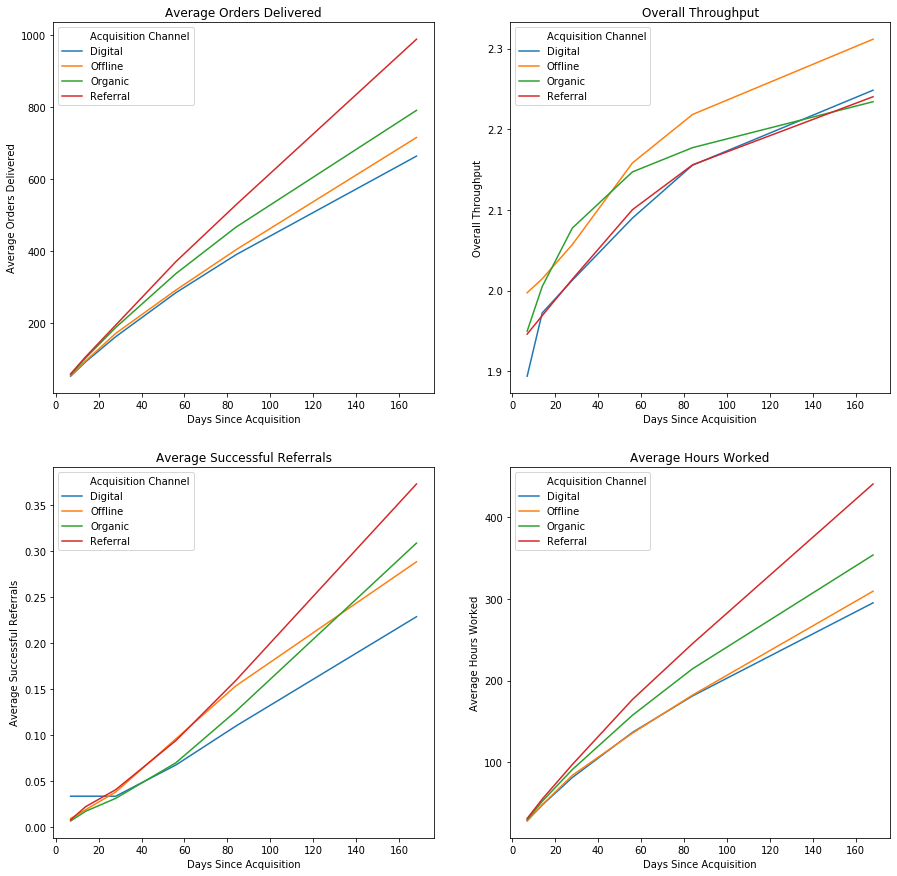

In [13]:
compare_rider_time_plot(ry_df,vehicle='Scooter / Motorcycle',acquisition_channels=['Organic','Digital','Referral','Offline'])

## Further steps/thoughts

- The growth in throughput for 2 of the sections analysed appears to slow, for X and Y. Why is this? Are the good riders churning or are the groups as a whole becoming less efficient?
- Are there are differences between the two different cohorts shown above? (users joining in the 2 different time windows)
- Look deeper into the success rate of referrals made by riders. This may indentify groups of riders who have a higher/lower success rate with their referrals. This could be used for targetting to boost the volume of referrals from riders with a high success rate and identify users who need education to be more successful with their referrals.
- Additionally can we look at 'groups' of riders who can be attributed back to a initial referral. ie: If rider A recruits rider B who recruits rider C, can we link rider C back to rider A. By grouping referrals in this way we may be able to better indentify high value 'recruiters'
- Look at Roo Town separately to investigate why the referral channel has so few applicants.
- Append rider churn data to this dataset, eg: the last date a rider worked. This would help identify the longevity of riders from different channels and also potentially help explain some of the curves seem some, eg: why does the growth rate of throughput fall for scooter riders in Roo York and Bicycle riders in Roo de Janeiro.


In [14]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>